In [11]:
!pip install tf-keras-vis
!mkdir images
!cd images
!mkdir outputs
!cd ..

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘images’: File exists


In [5]:
print("Executing : Load libraries")

import numpy as np
from matplotlib import pyplot as plt

import tensorflow as tf
from tf_keras_vis.utils import num_of_gpus

_, gpus = num_of_gpus()
print('Tensorflow recognized {} GPUs'.format(gpus))

Executing : Load libraries
Tensorflow recognized 1 GPUs


In [12]:
print("Executing : Load Model")

from keras.applications.mobilenet_v2 import MobileNetV2 as Model

model = Model(weights='imagenet', include_top=True)
#model.summary()

Executing : Load Model
14536120/14536120 [==============================] - 0s 0us/step


Executing : Preprocess Images


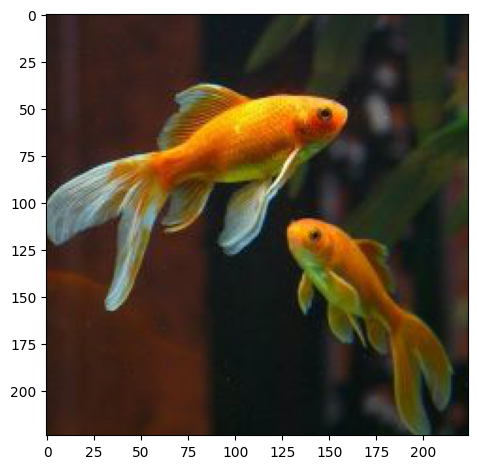

In [17]:
print("Executing : Preprocess Images")

from keras.utils import load_img

def preprocess(image):
  image = tf.cast(image, tf.float32)
  image = tf.image.resize(image, (224, 224))
  image = tf.keras.applications.mobilenet_v2.preprocess_input(image)
  image = image[None, ...]
  return image

# Image titles
image_titles = ['Goldfish', 'Bear', 'Assault rifle']

# Load images and Convert them to a Numpy array
img1 = load_img('images/goldfish.jpg', target_size=(224, 224))
# img2 = load_img('images/bear.jpg', target_size=(224, 224))
# img3 = load_img('images/soldiers.jpg', target_size=(224, 224))
# images = np.asarray([np.array(img1), np.array(img2), np.array(img3)])

# Preparing input data for VGG16
X = preprocess(img1)

# Rendering
# f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
# for i, title in enumerate(image_titles):
#     ax[i].set_title(title, fontsize=16)
#     ax[i].imshow(images[i])
#     ax[i].axis('off')
plt.imshow(img1)
plt.tight_layout()
plt.savefig('images/output/original_images.png')
plt.show()

In [18]:
print("Executing : Modifying model")

from tf_keras_vis.utils.model_modifiers import ReplaceToLinear

replace2linear = ReplaceToLinear()

# Instead of using the ReplaceToLinear instance above,
# you can also define the function from scratch as follows:
def model_modifier_function(cloned_model):
    cloned_model.layers[-1].activation = tf.keras.activations.linear

Executing : Modifying model


In [21]:
print("Executing : Creating score function")

from tf_keras_vis.utils.scores import CategoricalScore

# 1 is the imagenet index corresponding to Goldfish, 294 to Bear and 413 to Assault Rifle.
score = CategoricalScore([1])

# Instead of using CategoricalScore object,
# you can also define the function from scratch as follows:
def score_function(output):
    # The `output` variable refers to the output of the model,
    # so, in this case, `output` shape is `(3, 1000)` i.e., (samples, classes).
    return (output[0][1], output[1][294], output[2][413])

Executing : Creating score function


Executing : Classic Saliency


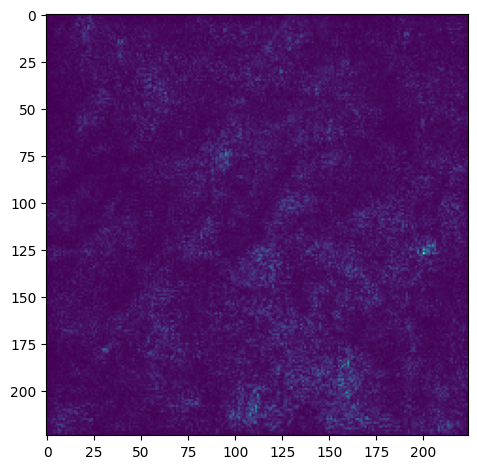

In [25]:
print("Executing : Classic Saliency")

from keras import backend as K
from tf_keras_vis.saliency import Saliency
# from tf_keras_vis.utils import normalize

# Create Saliency object.
saliency = Saliency(model,
                    model_modifier=replace2linear,
                    clone=True)

# Generate saliency map
saliency_map = saliency(score, X)

## Since v0.6.0, calling `normalize()` is NOT necessary.
# saliency_map = normalize(saliency_map)

# Render
# f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
# for i, title in enumerate(image_titles):
#     ax[i].set_title(title, fontsize=16)
#     ax[i].imshow(saliency_map[i], cmap='jet')
#     ax[i].axis('off')
plt.imshow(saliency_map[0])
plt.tight_layout()
plt.savefig('images/output/saliency_classic.png')
plt.show()

Executing : SmoothGrad Saliency


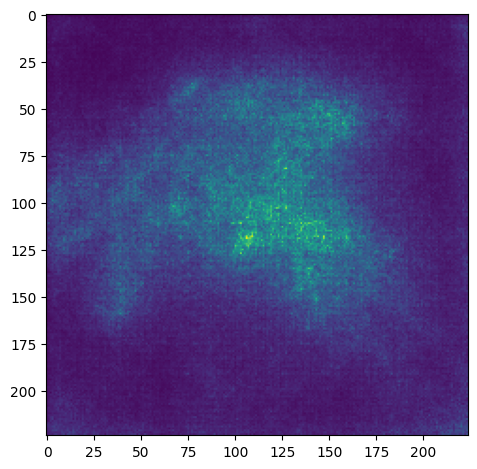

In [27]:
print("Executing : SmoothGrad Saliency")

# Generate saliency map with smoothing that reduce noise by adding noise
saliency_map = saliency(score,
                        X,
                        smooth_samples=20, # The number of calculating gradients iterations.
                        smooth_noise=0.20) # noise spread level.

## Since v0.6.0, calling `normalize()` is NOT necessary.
# saliency_map = normalize(saliency_map)

# Render
# f, ax = plt.subplots(nrows=1, ncols=3, figsize=(12, 4))
# for i, title in enumerate(image_titles):
#     ax[i].set_title(title, fontsize=14)
#     ax[i].imshow(saliency_map[i], cmap='jet')
#     ax[i].axis('off')
plt.imshow(saliency_map[0])
plt.tight_layout()
plt.savefig('images/output/saliency_smoothgrad.png')
plt.show()